<a href="https://colab.research.google.com/github/satwikakallem/Home_Assignment1/blob/main/Home_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Step 1: Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6), minval=0, maxval=10, dtype=tf.float32)

# Step 2: Find rank and shape of the tensor
rank = tf.rank(tensor)  # Get the rank (number of dimensions)
shape = tf.shape(tensor)  # Get the shape

print(f"Original Tensor:\n{tensor}")
print(f"Rank: {rank.numpy()}, Shape: {shape.numpy()}")

# Step 3: Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print(f"\nReshaped Tensor (2, 3, 4):\n{reshaped_tensor}")

# Step 4: Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print(f"\nTransposed Tensor (3, 2, 4):\n{transposed_tensor}")

# Step 5: Broadcasting a smaller tensor (1, 4) to match the larger tensor
small_tensor = tf.constant([[1.0, 2.0, 3.0, 4.0]])  # Shape (1, 4)

# Broadcasting it to match shape (3, 2, 4)
broadcasted_tensor = tf.broadcast_to(small_tensor, shape=(3, 2, 4))

# Adding the broadcasted tensor to the transposed tensor
result_tensor = transposed_tensor + broadcasted_tensor
print(f"\nBroadcasted Tensor:\n{broadcasted_tensor}")
print(f"\nResult after Addition:\n{result_tensor}")

# Explanation of Broadcasting in TensorFlow:
# Broadcasting allows tensors with different shapes to be added, multiplied, etc.
# TensorFlow automatically expands dimensions when one tensor has a smaller shape,
# making element-wise operations possible without explicit replication.
# In this case, a (1, 4) tensor is expanded to (3, 2, 4) to match the transposed tensor.


Original Tensor:
[[8.347074  5.991862  7.314875  4.331764  3.0891323 6.8218317]
 [2.925166  3.3416855 3.8856602 0.1802361 7.877845  1.3067043]
 [2.3006606 7.1404877 5.4341173 7.9160786 8.648985  9.7973385]
 [1.1631167 8.867834  5.512122  2.1706498 7.1158743 6.194071 ]]
Rank: 2, Shape: [4 6]

Reshaped Tensor (2, 3, 4):
[[[8.347074  5.991862  7.314875  4.331764 ]
  [3.0891323 6.8218317 2.925166  3.3416855]
  [3.8856602 0.1802361 7.877845  1.3067043]]

 [[2.3006606 7.1404877 5.4341173 7.9160786]
  [8.648985  9.7973385 1.1631167 8.867834 ]
  [5.512122  2.1706498 7.1158743 6.194071 ]]]

Transposed Tensor (3, 2, 4):
[[[8.347074  5.991862  7.314875  4.331764 ]
  [2.3006606 7.1404877 5.4341173 7.9160786]]

 [[3.0891323 6.8218317 2.925166  3.3416855]
  [8.648985  9.7973385 1.1631167 8.867834 ]]

 [[3.8856602 0.1802361 7.877845  1.3067043]
  [5.512122  2.1706498 7.1158743 6.194071 ]]]

Broadcasted Tensor:
[[[1. 2. 3. 4.]
  [1. 2. 3. 4.]]

 [[1. 2. 3. 4.]
  [1. 2. 3. 4.]]

 [[1. 2. 3. 4.]
  [1. 2

Initial MSE Loss: 0.024999999999999994
Initial CCE Loss: 0.164252033486018
Modified MSE Loss: 0.013883886351795233
Modified CCE Loss: 0.11070903212445474


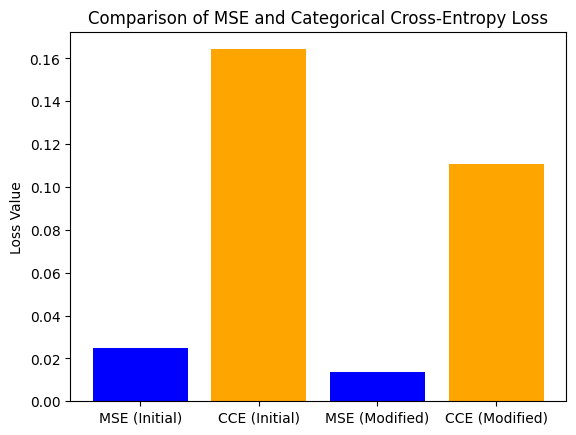

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define true values (y_true) and model predictions (y_pred)
y_true = np.array([0, 1, 0, 1])  # Example binary true labels for simplicity
y_pred = np.array([0.1, 0.9, 0.2, 0.8])  # Example initial predictions (probabilities)

# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Categorical Cross-Entropy (CCE) Loss
def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Ensure predictions are within a valid range
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Compute the initial loss values
mse_loss = mean_squared_error(y_true, y_pred)
cce_loss = categorical_cross_entropy(y_true, y_pred)

# Modify predictions slightly
y_pred_modified = y_pred + np.random.normal(0, 0.05, size=y_pred.shape)  # Adding small noise

# Compute the modified loss values
mse_loss_modified = mean_squared_error(y_true, y_pred_modified)
cce_loss_modified = categorical_cross_entropy(y_true, y_pred_modified)

# Print the results
print("Initial MSE Loss:", mse_loss)
print("Initial CCE Loss:", cce_loss)
print("Modified MSE Loss:", mse_loss_modified)
print("Modified CCE Loss:", cce_loss_modified)

# Plot the loss values using a bar chart
labels = ['MSE (Initial)', 'CCE (Initial)', 'MSE (Modified)', 'CCE (Modified)']
loss_values = [mse_loss, cce_loss, mse_loss_modified, cce_loss_modified]

plt.bar(labels, loss_values, color=['blue', 'orange', 'blue', 'orange'])
plt.title("Comparison of MSE and Categorical Cross-Entropy Loss")
plt.ylabel("Loss Value")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.8993 - loss: 0.3516 - val_accuracy: 0.9794 - val_loss: 0.0648
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9833 - loss: 0.0575 - val_accuracy: 0.9831 - val_loss: 0.0506
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9883 - loss: 0.0389 - val_accuracy: 0.9829 - val_loss: 0.0562
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9913 - loss: 0.0271 - val_accuracy: 0.9869 - val_loss: 0.0425
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9929 - loss: 0.0201 - val_accuracy: 0.9853 - val_loss: 0.0427
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9856 - val_loss: 0.0435
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9877 - val_loss: 0.0400
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9983 - loss: 0.0065 - 

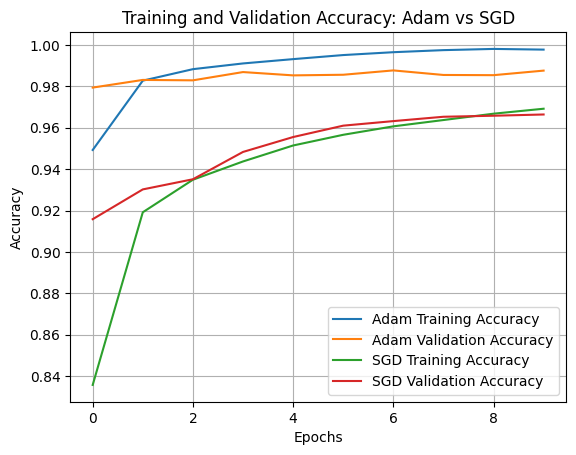

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess the data (normalize and reshape)
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

# Define the model architecture
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create two models: one with Adam optimizer, one with SGD optimizer
adam_model = create_model(optimizer='adam')
sgd_model = create_model(optimizer=tf.keras.optimizers.SGD())

# Train the models and store history
adam_history = adam_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
sgd_history = sgd_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Plot accuracy comparison
plt.plot(adam_history.history['accuracy'], label='Adam Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy')
plt.plot(sgd_history.history['accuracy'], label='SGD Training Accuracy')
plt.plot(sgd_history.history['val_accuracy'], label='SGD Validation Accuracy')

plt.title('Training and Validation Accuracy: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load the MNIST dataset and preprocess it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard logging
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

print("Training complete. Run the following command to launch TensorBoard:")
print("tensorboard --logdir=logs/fit")

# Explanation:
# - Loads the MNIST dataset and normalizes the pixel values.
# - Defines a simple neural network with a dropout layer to prevent overfitting.
# - Uses sparse categorical cross-entropy loss for multi-class classification.
# - Logs training data to TensorBoard for visualization.
# - You can monitor loss and accuracy trends by running TensorBoard.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8559 - loss: 0.4841 - val_accuracy: 0.9590 - val_loss: 0.1397
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9539 - loss: 0.1553 - val_accuracy: 0.9669 - val_loss: 0.1074
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9675 - loss: 0.1093 - val_accuracy: 0.9734 - val_loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9751 - loss: 0.0825 - val_accuracy: 0.9755 - val_loss: 0.0804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9771 - loss: 0.0740 - val_accuracy: 0.9769 - val_loss: 0.0776
Training complete. Run the following command to launch TensorBoard:
tensorboard --logdir=logs/fit
